In [6]:
import torch
from torchvision import transforms
from PIL import Image

In [10]:
# Show the cropped images
import matplotlib.pyplot as plt

def plot_img(img1, img2):

    plt.figure(figsize=(10, 5))

    # Display the cropped image
    plt.subplot(1, 2, 1)
    plt.imshow(img1.squeeze(0).permute(1, 2, 0))
    plt.title('Cropped Image')
    plt.axis('off')

    # Display the cropped style
    plt.subplot(1, 2, 2)
    plt.imshow(img2.squeeze(0).permute(1, 2, 0))
    plt.title('Cropped Style')
    plt.axis('off')

    plt.show()


In [26]:
# Load the images
image_path = "images/content/golden_gate.jpg"
#style_path = "images/style/sketch.png"
style_path = "images/style/Texturelabs_Grunge_337S.jpg"

image = Image.open(image_path).convert('RGB')
style = Image.open(style_path).convert('RGB')

# Define the transformation to crop the images to size 224x224
crop_transform = transforms.CenterCrop((224, 224))

# Apply the transformation to the images
cropped_image = crop_transform(image)
cropped_style = crop_transform(style)

# Convert PIL images to PyTorch tensors
image_tensor = transforms.ToTensor()(cropped_image).unsqueeze(0)
style_tensor = transforms.ToTensor()(cropped_style).unsqueeze(0)

rawed_image = (image_tensor - image_tensor.mean())/image_tensor.std()
image_with_style = rawed_image*style_tensor.std() + style_tensor.mean()

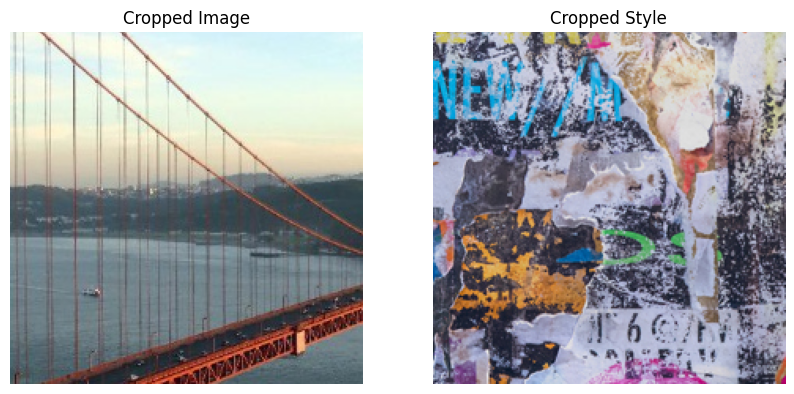

In [27]:
plot_img(image_tensor, style_tensor)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


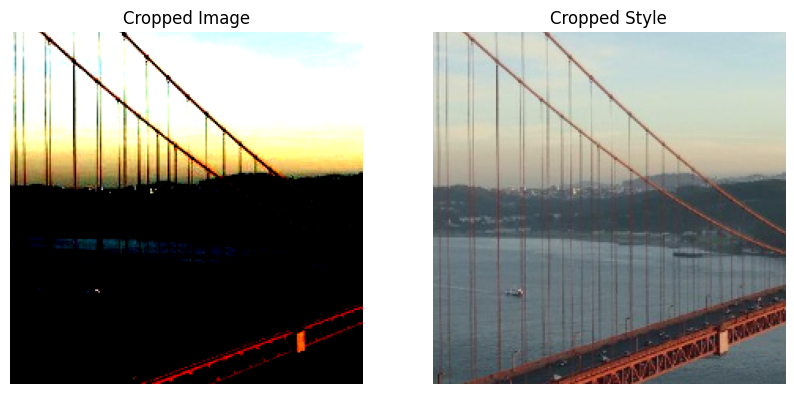

In [28]:
plot_img(rawed_image, image_with_style)